# Classifying Bristol Neighbourhoods from Airbnb data

Being able to identify a neighbourhood from Airbnb data could help gain insight on what features contribute towards distinguish one neighbourhood over another. Such an analysis could be carried out in a larger study in order to identify up-and-coming, or gentrified, neighbourhoods.

In [419]:
import pandas as pd
import seaborn as sns
sns.set();
import matplotlib.pyplot as plt

# sns.set(style="whitegrid")

In [420]:
df = pd.read_csv("BristolAirbnbListings.csv")
len(df)

2375

In [421]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
postcode                           object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                       object
bathrooms                          object
bedrooms                           object
beds                               object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
review_scores_rating               object
review_scores_accuracy             object
review_scores_cleanliness          object
review_scores_checkin              object
review_scores_communication       

In [422]:
# df = df.drop(df.columns["id", "name", "host_id", "host_name", "postcode",
#                         "latitude", "longitude", "last_review", ""], axis=1)
df = df[["neighbourhood", "property_type", "room_type", "accommodates",
          "bathrooms", "bedrooms", "beds", "price", "minimum_nights", "number_of_reviews",
         "reviews_per_month", "calculated_host_listings_count", "availability_365"]]

In [423]:
print(df.dtypes)

neighbourhood                      object
property_type                      object
room_type                          object
accommodates                       object
bathrooms                          object
bedrooms                           object
beds                               object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [424]:
set(df.room_type)

{'Entire home/apt', 'Private room', 'Shared room'}

In [425]:
set(df.neighbourhood)

{'Ashley',
 'Avonmouth & Lawrence Weston',
 'Bedminster',
 'Bishopston & Ashley Down',
 'Bishopsworth',
 'Brislington East',
 'Brislington West',
 'Central',
 'Clifton',
 'Clifton Down',
 'Cotham',
 'Easton',
 'Eastville',
 'Filwood',
 'Frome Vale',
 'Hartcliffe & Withywood',
 'Henbury & Brentry',
 'Hengrove & Whitchurch Park',
 'Hillfields',
 'Horfield',
 'Hotwells & Harbourside',
 'Knowle',
 'Lawrence Hill',
 'Lockleaze',
 'Redland',
 'Southmead',
 'Southville',
 'St George Central',
 'St George Troopers Hill',
 'St George West',
 'Stockwood',
 'Stoke Bishop',
 'Westbury-on-Trym & Henleaze',
 'Windmill Hill'}

In [426]:
df.loc[(df["room_type"] == "Private room") | (df["room_type"] == "Shared room"), 'room_type'] = "no"
df.loc[df["room_type"] == "Entire home/apt", "room_type"] = "yes"
df = df.rename(index=str, columns={"room_type": "entire_home"})

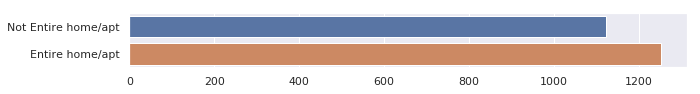

In [427]:
plt.figure(figsize=(10,1))
from collections import Counter
cnt = Counter(df.entire_home.sort_values())
ax = sns.barplot(x=list(cnt.values()), y=["Not Entire home/apt", "Entire home/apt"])

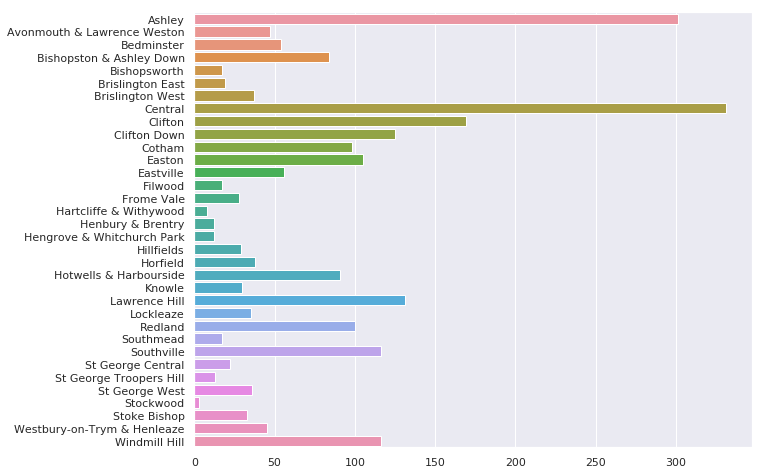

In [428]:
plt.figure(figsize=(10,8))
from collections import Counter
cnt = Counter(df.neighbourhood.sort_values())
ax = sns.barplot(x=list(cnt.values()), y=list(cnt.keys()))

1758


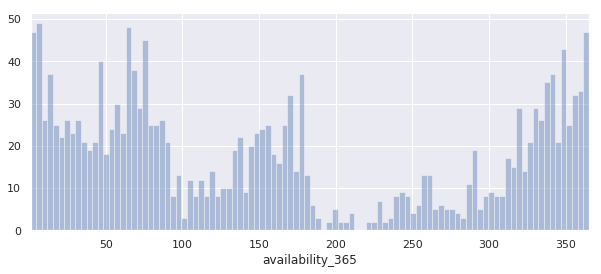

In [429]:
print(len(df.loc[df.availability_365 != 0, 'availability_365']))
plt.figure(figsize=(10,4))
sns.distplot(df.loc[df.availability_365 != 0, 'availability_365'], 100, kde=False)
lims = plt.xlim(1, max(df.availability_365))

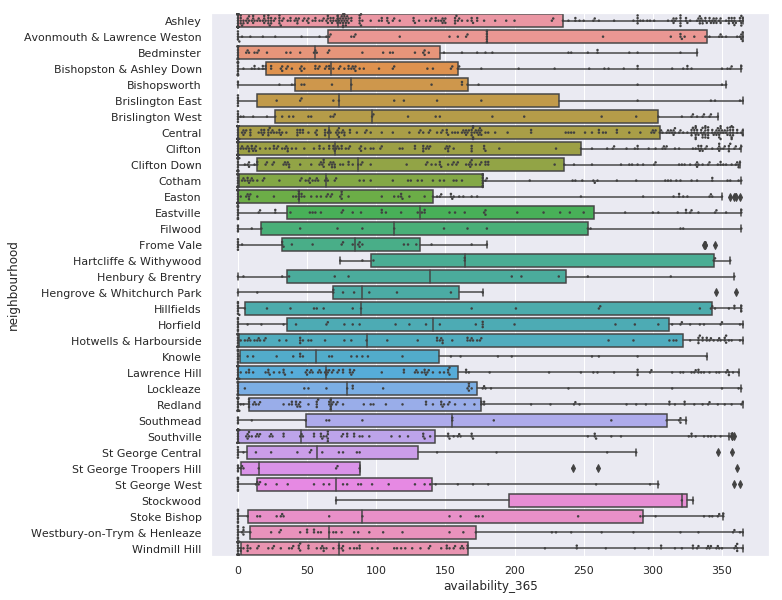

In [430]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=df.availability_365, y=df.neighbourhood.sort_values(), orient='h')
ax = sns.swarmplot(x=df.availability_365, y=df.neighbourhood.sort_values(), size=2.5, color=".25")

In [431]:
dummies = pd.get_dummies(df.entire_home, prefix="entire_home")
df = df.drop(columns="entire_home")
df = pd.concat([df, dummies], axis=1)

In [432]:
df.accommodates = pd.to_numeric(df.accommodates, errors='coerce', downcast='signed')
print(len(df[df.accommodates.isnull()]))
df = df.dropna(subset=['accommodates'])

22


In [433]:
df.bathrooms = pd.to_numeric(df.bathrooms, errors='coerce')
print(len(df[df.bathrooms.isnull()]))
df = df.dropna(subset=['bathrooms'])

3


In [434]:
df.bedrooms = pd.to_numeric(df.bedrooms, errors='coerce', downcast='signed')
print(len(df[df.bedrooms.isnull()]))
df = df.dropna(subset=['bedrooms'])

3


In [435]:
df.beds = pd.to_numeric(df.beds, errors='coerce', downcast='signed')
print(len(df[df.beds.isnull()]))
df = df.dropna(subset=['beds'])

2


In [436]:
df.isnull().any()

neighbourhood                     False
property_type                     False
accommodates                      False
bathrooms                         False
bedrooms                          False
beds                              False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
entire_home_no                    False
entire_home_yes                   False
dtype: bool

In [453]:
print(len(df[df.reviews_per_month.isnull()]))
print(len(df.loc[(df.reviews_per_month.isnull()) & (df.number_of_reviews == 0), 'reviews_per_month']))
df.loc[(df.reviews_per_month.isnull()) & (df.number_of_reviews == 0), 'reviews_per_month'] = 0
df[df.reviews_per_month.isnull()]
df = df.dropna(subset=['reviews_per_month'])

0
0


,neighbourhood,property_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,entire_home_no,entire_home_yes


In [456]:
df.isnull().any().any()

False

In [457]:
df.dtypes

neighbourhood                      object
property_type                      object
accommodates                      float64
bathrooms                         float64
bedrooms                          float64
beds                              float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
entire_home_no                      uint8
entire_home_yes                     uint8
dtype: object

In [458]:
len(df)

2342

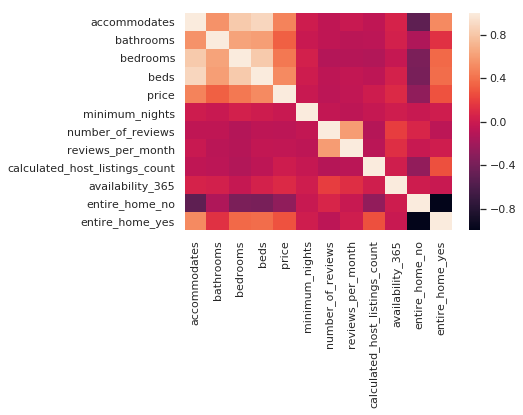

In [333]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
ax = sns.heatmap(corr)

In [460]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,entire_home_no,entire_home_yes
count,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000
mean,3.116567,1.241674,1.435098,1.811699,76.905209,2.818531,31.573442,1.914389,6.989752,120.853117,0.470965,0.529035
std,2.147207,0.607940,0.983772,1.538341,129.986696,13.202848,51.310593,2.182933,16.874385,128.240186,0.499263,0.499263
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,35.000000,1.000000,2.000000,0.290000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,59.500000,2.000000,11.000000,1.095000,1.000000,71.000000,0.000000,1.000000
75%,4.000000,1.000000,2.000000,2.000000,85.000000,2.000000,38.000000,2.830000,3.000000,212.000000,1.000000,1.000000
max,16.000000,12.500000,13.000000,24.000000,5000.000000,365.000000,477.000000,18.030000,78.000000,365.000000,1.000000,1.000000
